In [2]:
%matplotlib inline
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('monthly-airline-passengers.csv')

In [4]:
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.index

RangeIndex(start=0, stop=144, step=1)

In [6]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [7]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [8]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


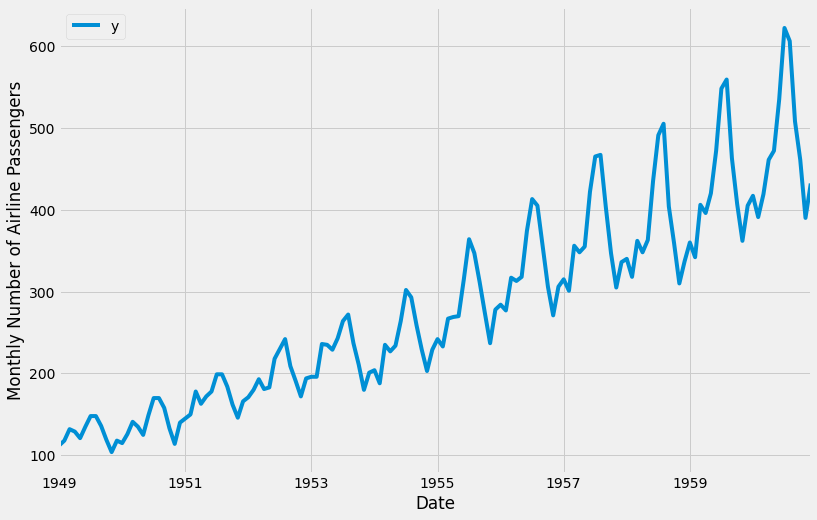

In [9]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [10]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [11]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.46502


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       401.677    0.00201475       115.592           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       401.828   0.000134142          74.7    1.55e-06       0.001      269  LS failed, Hessian reset 
     199       401.835   6.26662e-06        86.413           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       401.838   3.04345e-05         78.56   4.006e-07       0.001      358  LS failed, Hessian reset 
     271       401.841   4.25818e-08       65.5302      0.2948           1      439   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [13]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')

In [14]:
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [15]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [17]:
forecast = my_model.predict(future_dates)

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [18]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.180464,602.044376,694.198656
176,1963-09-01,601.692718,557.416935,644.387502
177,1963-10-01,565.656684,519.730378,609.035522
178,1963-11-01,533.699374,488.815820,579.521018
179,1963-12-01,563.248385,519.411122,607.182357


In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.119390,43.048274,132.065906,106.119390,106.119390,-21.893569,-21.893569,-21.893569,-21.893569,-21.893569,-21.893569,0.0,0.0,0.0,84.225821
1,1949-02-01,108.306074,30.353647,120.878619,108.306074,108.306074,-30.662653,-30.662653,-30.662653,-30.662653,-30.662653,-30.662653,0.0,0.0,0.0,77.643421
2,1949-03-01,110.281143,64.443456,154.155132,110.281143,110.281143,-0.499370,-0.499370,-0.499370,-0.499370,-0.499370,-0.499370,0.0,0.0,0.0,109.781773
3,1949-04-01,112.467827,62.950503,149.053945,112.467827,112.467827,-5.148068,-5.148068,-5.148068,-5.148068,-5.148068,-5.148068,0.0,0.0,0.0,107.319759
4,1949-05-01,114.583972,66.220062,152.299871,114.583972,114.583972,-3.741679,-3.741679,-3.741679,-3.741679,-3.741679,-3.741679,0.0,0.0,0.0,110.842293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,581.803431,602.044376,694.198656,577.161310,586.487922,67.377033,67.377033,67.377033,67.377033,67.377033,67.377033,0.0,0.0,0.0,649.180464
176,1963-09-01,584.911345,557.416935,644.387502,580.092097,589.784829,16.781372,16.781372,16.781372,16.781372,16.781372,16.781372,0.0,0.0,0.0,601.692718
177,1963-10-01,587.919004,519.730378,609.035522,582.865190,593.001484,-22.262320,-22.262320,-22.262320,-22.262320,-22.262320,-22.262320,0.0,0.0,0.0,565.656684
178,1963-11-01,591.026918,488.815820,579.521018,585.795079,596.379782,-57.327544,-57.327544,-57.327544,-57.327544,-57.327544,-57.327544,0.0,0.0,0.0,533.699374


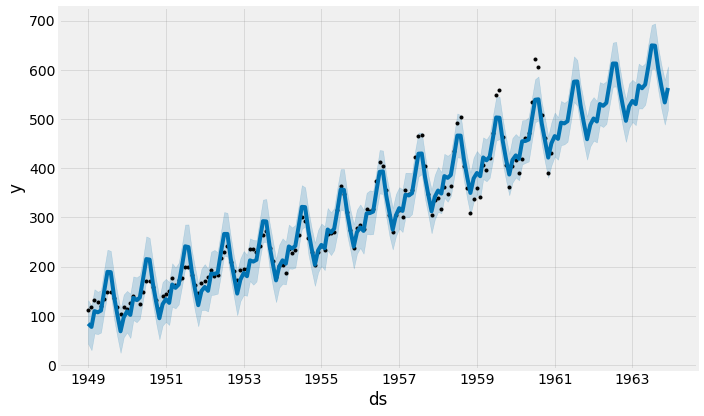

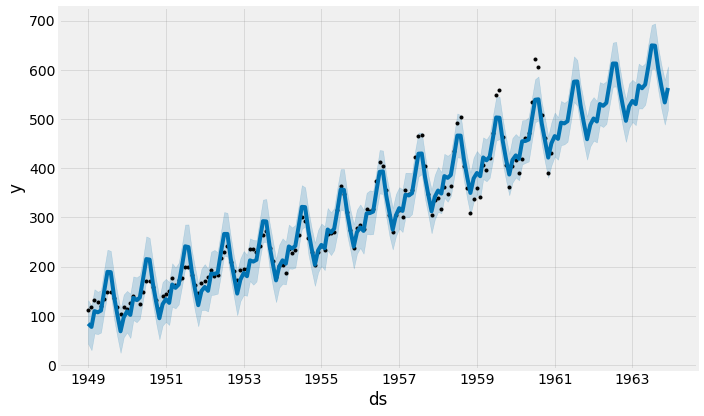

In [20]:
my_model.plot(forecast, uncertainty=True)

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


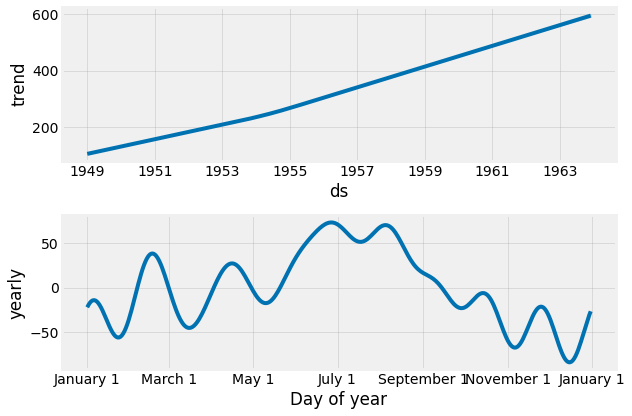

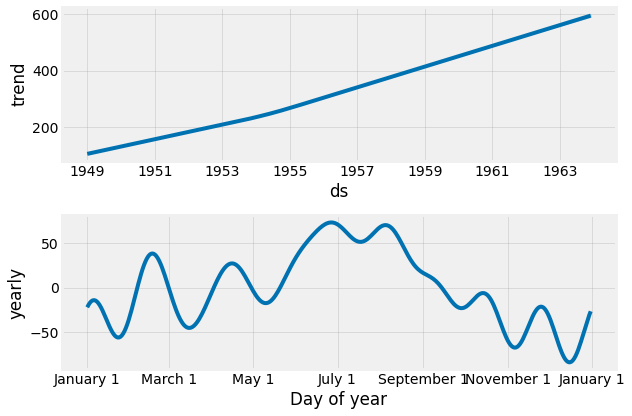

In [22]:
my_model.plot_components(forecast)